In [271]:
import numpy as np
import pandas as pd
import scipy as sp

from scipy.interpolate import interp1d, UnivariateSpline, InterpolatedUnivariateSpline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from tqdm import tqdm_notebook as tqdm

import os

In [272]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('thinfig')

In [273]:
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

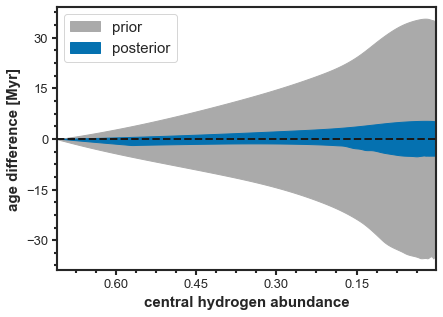

In [274]:
Xs = np.arange(0.001, 0.71, 0.001)

DFs = [pd.read_table('mesa/work/solar/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/solar2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6, s=0)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6, s=0)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6, s=0)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [Myr]');
plt.tight_layout()
plt.savefig('turnoff_1M.pdf')

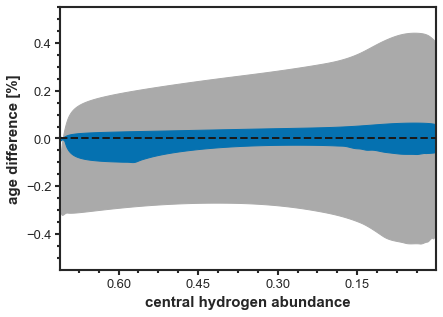

In [275]:
Xs = np.arange(0.001, 0.71, 0.001)

DFs = [pd.read_table('mesa/work/solar/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/solar2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6, s=0)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6, s=0)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6, s=0)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
#plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
plt.ylim([-0.55, 0.55])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [%]');
plt.tight_layout()
#plt.savefig('turnoff_1M.pdf')

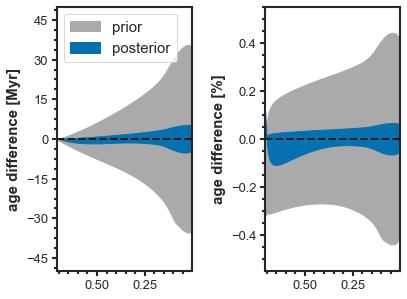

In [276]:
plt.figure(figsize=(6,4.5))

Xs = np.arange(0.001, 0.71, 0.001)

plt.subplot(121)
#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(6, 6))

DFs = [pd.read_table('mesa/work/solar/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/solar2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
plt.ylim([-50, 50])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
#plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [Myr]');


plt.subplot(122)

DFs = [pd.read_table('mesa/work/solar/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/solar2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['center_h1'][::-1], DFs[0]['star_age'][::-1]/1e6)
m1s  = UnivariateSpline(DFs[1]['center_h1'][::-1], DFs[1]['star_age'][::-1]/1e6)
m1p1 = UnivariateSpline(DFs[2]['center_h1'][::-1], DFs[2]['star_age'][::-1]/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
#plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
plt.ylim([-0.55, 0.55])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
#plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [%]');


#plt.supxlabel(r'central hydrogen abundance')


plt.tight_layout()


#plt.savefig('turnoff_1M.pdf')

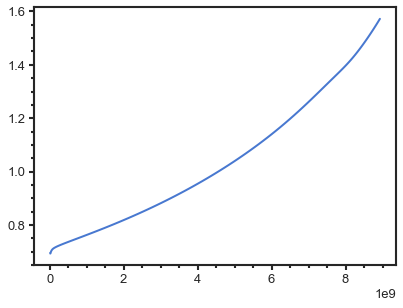

In [277]:
DF = pd.read_table('mesa/work/solar/s/history.data', sep='\s+', skiprows=5)
DF = DF[np.max(np.where(np.diff(DF.log_L) < 0)):]
np.diff(DF.log_L)
plt.plot(DF.star_age, 10**DF.log_L)

In [278]:
def get_DFs(dirname):
    DFs = []
    for rate in ['m1', 's', 'p1']:
        DF = pd.read_table('mesa/work/' + dirname + '/' + rate + '/history.data', sep='\s+', skiprows=5)
        DF = DF[(np.max(np.where(np.diff(DF.log_L) < 0))+1):]
        DF['luminosity'] = 10**DF.log_L
        DFs += [DF]
    return DFs

DFs = get_DFs('solar')

In [279]:
np.diff(DFs[0]['luminosity'])

array([0.0004914 , 0.00160209, 0.00207905, 0.00226083, 0.00230258,
       0.00227537, 0.00219832, 0.00207366, 0.00194748, 0.00187147,
       0.00186711, 0.00194128, 0.0020758 , 0.00227956, 0.00254722,
       0.00288851, 0.00331967, 0.00385681, 0.00452737, 0.00536112,
       0.00639614, 0.00769927, 0.00890377, 0.00795873, 0.00757894,
       0.00743602, 0.0074078 , 0.00744212, 0.00750402, 0.00758787,
       0.00767873, 0.00777642, 0.0078818 , 0.00798751, 0.00809606,
       0.00820865, 0.00832184, 0.00843699, 0.00855355, 0.00867388,
       0.00879666, 0.00891806, 0.00904517, 0.00917164, 0.00930163,
       0.00943097, 0.00956499, 0.00970094, 0.00983742, 0.00997997,
       0.01012511, 0.01027357, 0.0104288 , 0.0105881 , 0.01075348,
       0.0109293 , 0.01110981, 0.01130202, 0.01150583, 0.0117194 ,
       0.01194873, 0.0121904 , 0.01244516, 0.01271316, 0.01299287,
       0.01327527, 0.01356033, 0.01383755, 0.01409269, 0.0143082 ,
       0.01447873, 0.01456163, 0.01457395, 0.01445232, 0.01422

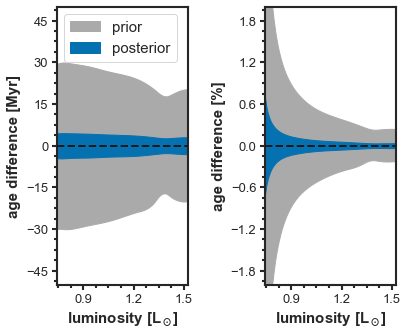

In [280]:
plt.figure(figsize=(6,5))

plt.subplot(121)

DFs = get_DFs('solar')

Lmin = np.min(DFs[1].luminosity)+0.05
Lmax = np.max(DFs[1].luminosity)-0.05
Xs = np.linspace(Lmin, Lmax, 100)

m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color='#aaaaaa', label=r'prior')

DFs = get_DFs('solar2')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, Lmax])
plt.ylim([-50, 50])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [Myr]');
plt.xlabel(r'luminosity [L$\mathbf{_\odot}$]')

plt.subplot(122)

DFs = get_DFs('solar')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = get_DFs('solar2')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, Lmax])
plt.ylim([-2, 2])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [%]');
plt.xlabel(r'luminosity [L$\mathbf{_\odot}$]')

#plt.suptitle(r'$\qquad1~\rm{M}_\odot$', y=0.94)
plt.tight_layout()
plt.savefig('turnoff_1M.pdf')

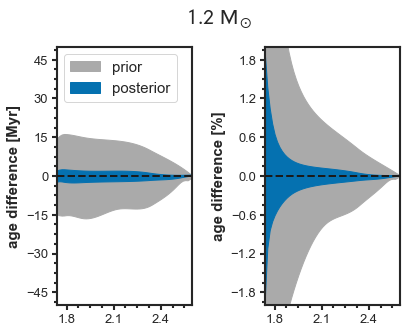

In [281]:
plt.figure(figsize=(6,5))

plt.subplot(121)

DFs = get_DFs('cc')

Lmin = np.min(DFs[1].luminosity)+0.05
Lmax = np.max(DFs[1].luminosity)-0.05
Xs = np.linspace(Lmin, Lmax, 100)

m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color='#aaaaaa', label=r'prior')

DFs = get_DFs('cc2')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, 2.6])
plt.ylim([-50, 50])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [Myr]');


plt.subplot(122)

DFs = get_DFs('cc')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = get_DFs('cc2')
m1m1 = UnivariateSpline(DFs[0]['luminosity'], DFs[0]['star_age']/1e6)
m1s  = UnivariateSpline(DFs[1]['luminosity'], DFs[1]['star_age']/1e6)
m1p1 = UnivariateSpline(DFs[2]['luminosity'], DFs[2]['star_age']/1e6)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, 2.6])
plt.ylim([-2, 2])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [%]');

plt.suptitle(r'$\qquad1.2~\rm{M}_\odot$', y=0.94)
plt.tight_layout()
#plt.savefig('turnoff_1M.pdf')

(2500000000.0, 4000000000.0)

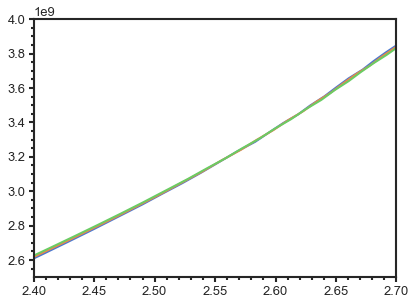

In [282]:
DFs = get_DFs('cc')
for DF in DFs:
    plt.plot(DF.luminosity, DF.star_age)

plt.xlim([2.4, 2.7])
plt.ylim([2.5e9, 4e9])

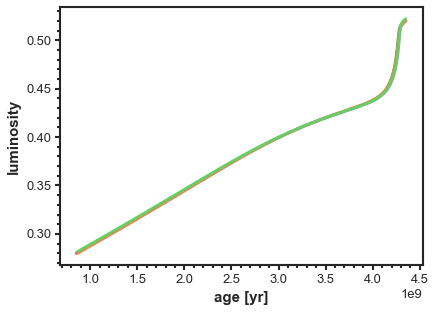

In [283]:
DF = pd.read_table('mesa/work/cc/s/history.data', sep='\s+', skiprows=5)
plt.plot(DF.star_age[50:], DF.log_L[50:], lw=3, label='standard')
DF = pd.read_table('mesa/work/cc/p1/history.data', sep='\s+', skiprows=5)
plt.plot(DF.star_age[50:], DF.log_L[50:], lw=3, label='+1')
DF = pd.read_table('mesa/work/cc/m1/history.data', sep='\s+', skiprows=5)
plt.plot(DF.star_age[50:], DF.log_L[50:], lw=3, label='-1')
#plt.xlim([2e9, 4e9])
#plt.ylim([0.1, 0.4])
plt.xlabel('age [yr]')
plt.ylabel('luminosity')
plt.show()

KeyError: 'logL'

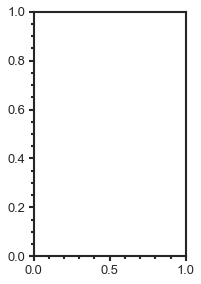

In [284]:
plt.figure(figsize=(6,4.5))

plt.subplot(121)
#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(6, 6))

DFs = [pd.read_table('mesa/work/cc/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]

Xs = np.linspace(np.min(DFs[1]['logL']/1e6), np.max(DFs[1]['logL']/1e6), 100)
m1m1 = UnivariateSpline(DFs[0]['star_age']/1e6, DFs[0]['center_h1'])
m1s  = UnivariateSpline(DFs[1]['star_age']/1e6, DFs[1]['center_h1'])
m1p1 = UnivariateSpline(DFs[2]['star_age']/1e6, DFs[2]['center_h1'])
plt.fill_between(m1s(Xs), 
                 (m1p1(Xs) - m1s(Xs)), 
                 (m1m1(Xs) - m1s(Xs)), 
                 color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/cc2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['star_age']/1e6, DFs[0]['center_h1'])
m1s  = UnivariateSpline(DFs[1]['star_age']/1e6, DFs[1]['center_h1'])
m1p1 = UnivariateSpline(DFs[2]['star_age']/1e6, DFs[2]['center_h1'])
plt.fill_between(m1s(Xs), (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
#plt.ylim([-50, 50])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
#plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [Myr]');


plt.subplot(122)

DFs = [pd.read_table('mesa/work/cc/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['star_age']/1e6, DFs[0]['center_h1'])
m1s  = UnivariateSpline(DFs[1]['star_age']/1e6, DFs[1]['center_h1'])
m1p1 = UnivariateSpline(DFs[2]['star_age']/1e6, DFs[2]['center_h1'])
plt.fill_between(m1s(Xs), 
                 (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = [pd.read_table('mesa/work/cc2/' + rate + '/history.data', sep='\s+', skiprows=5)
       for rate in ['m1', 's', 'p1']]
m1m1 = UnivariateSpline(DFs[0]['star_age']/1e6, DFs[0]['center_h1'])
m1s  = UnivariateSpline(DFs[1]['star_age']/1e6, DFs[1]['center_h1'])
m1p1 = UnivariateSpline(DFs[2]['star_age']/1e6, DFs[2]['center_h1'])
plt.fill_between(m1s(Xs), (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
#plt.legend(loc='upper left')

plt.xlim([0.71, 0.001])
#plt.ylim([-0.55, 0.55])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
#plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
#plt.xlabel(r'central hydrogen abundance')
plt.ylabel(r'age difference [%]');


#plt.supxlabel(r'central hydrogen abundance')


plt.tight_layout()


#plt.savefig('turnoff_1M.pdf')

In [285]:
colnames = ['model', 'mass', 'age', 'R', 'Teff', 'L', 'Xc', 'qc']
DF = pd.read_table('turnoff/m1s/LOGS/history.data', sep='\s+', skiprows=4, 
             names=colnames)
DF

,model,mass,age,R,Teff,L,Xc,qc
0,1,1.0,0.00000,6.186490e+10,5644.4,0.720,0.714180,0.0
1,2,1.0,0.00063,6.186500e+10,5644.4,0.720,0.714126,0.0
2,3,1.0,0.02305,6.188740e+10,5644.7,0.720,0.712473,0.0
3,4,1.0,0.06787,6.194910e+10,5646.2,0.723,0.709129,0.0
4,5,1.0,0.13063,6.202140e+10,5647.9,0.725,0.704465,0.0
...,...,...,...,...,...,...,...,...
97,98,1.0,8.80266,8.562510e+10,5805.3,1.543,0.001942,0.0
98,99,1.0,8.83866,8.586950e+10,5804.5,1.551,0.001633,0.0
99,100,1.0,8.87444,8.611580e+10,5803.6,1.559,0.001370,0.0
100,101,1.0,8.90998,8.636440e+10,5802.8,1.567,0.001146,0.0


In [312]:
def get_DFs(dirname, m):
    DFs = []
    for rate in ['m1', 's', 'p1']:
        DF = pd.read_table(dirname + '/' + m + rate + '/LOGS/history.data', sep='\s+', names=colnames, skiprows=4)
        DF = DF.drop_duplicates(subset='L')
        DF['luminosity'] = DF.L
        DFs += [DF]
    return DFs

DFs = get_DFs('turnoff', 'm1')
DFs

[     model  mass      age             R    Teff      L        Xc   qc  \
 0        1   1.0  0.00000  6.183680e+10  5648.5  0.721  0.714180  0.0   
 2        3   1.0  0.02305  6.185940e+10  5648.8  0.722  0.712469  0.0   
 3        4   1.0  0.06787  6.192130e+10  5650.3  0.724  0.709119  0.0   
 4        5   1.0  0.13063  6.199380e+10  5652.0  0.727  0.704445  0.0   
 5        6   1.0  0.21849  6.210980e+10  5654.8  0.731  0.697863  0.0   
 ..     ...   ...      ...           ...     ...    ...       ...  ...   
 97      98   1.0  8.76522  8.546280e+10  5807.4  1.539  0.001970  0.0   
 98      99   1.0  8.80115  8.570470e+10  5806.6  1.547  0.001659  0.0   
 99     100   1.0  8.83687  8.594920e+10  5805.8  1.555  0.001394  0.0   
 100    101   1.0  8.87236  8.619620e+10  5804.9  1.563  0.001167  0.0   
 101    102   1.0  8.90760  8.644510e+10  5804.1  1.571  0.000975  0.0   
 
      luminosity  
 0         0.721  
 2         0.722  
 3         0.724  
 4         0.727  
 5         0.73

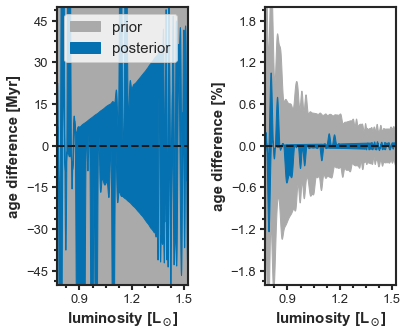

In [314]:
plt.figure(figsize=(6,5))

plt.subplot(121)

DFs = get_DFs('turnoff', 'm1')

Lmin = np.min(DFs[1].luminosity)+0.05
Lmax = np.max(DFs[1].luminosity)-0.05
Xs = np.linspace(Lmin, Lmax, 1000)

m1m1 = InterpolatedUnivariateSpline(DFs[0]['luminosity'], DFs[0]['age']*1e4)
m1s  = InterpolatedUnivariateSpline(DFs[1]['luminosity'], DFs[1]['age']*1e4)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['luminosity'], DFs[2]['age']*1e4)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color='#aaaaaa', label=r'prior')

DFs = get_DFs('turnoff2', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['luminosity'], DFs[0]['age']*1e4)
m1s  = InterpolatedUnivariateSpline(DFs[1]['luminosity'], DFs[1]['age']*1e4)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['luminosity'], DFs[2]['age']*1e4)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), (m1m1(Xs) - m1s(Xs)), color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, Lmax])
plt.ylim([-50, 50])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [Myr]');
plt.xlabel(r'luminosity [L$\mathbf{_\odot}$]')

plt.subplot(122)

DFs = get_DFs('turnoff', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['luminosity'], DFs[0]['age']*1e4)
m1s  = InterpolatedUnivariateSpline(DFs[1]['luminosity'], DFs[1]['age']*1e4)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['luminosity'], DFs[2]['age']*1e4)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = get_DFs('turnoff2', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['luminosity'], DFs[0]['age']*1e4)
m1s  = InterpolatedUnivariateSpline(DFs[1]['luminosity'], DFs[1]['age']*1e4)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['luminosity'], DFs[2]['age']*1e4)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)

#plt.xlim([0.71, 0.001])
plt.xlim([Lmin, Lmax])
plt.ylim([-2, 2])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
plt.ylabel(r'age difference [%]');
plt.xlabel(r'luminosity [L$\mathbf{_\odot}$]')

#plt.suptitle(r'$\qquad1~\rm{M}_\odot$', y=0.94)
plt.tight_layout()
#plt.savefig('turnoff_1M.pdf')

In [316]:
def get_DFs(dirname, m):
    DFs = []
    for rate in ['m1', 's', 'p1']:
        DF = pd.read_table(dirname + '/' + m + rate + '/LOGS/history.data', sep='\s+', names=colnames, skiprows=4)
        DF = DF[::-1]
        DFs += [DF]
    return DFs

DFs = get_DFs('turnoff', 'm1')
DFs

[     model  mass      age             R    Teff      L        Xc   qc
 101    102   1.0  8.90760  8.644510e+10  5804.1  1.571  0.000975  0.0
 100    101   1.0  8.87236  8.619620e+10  5804.9  1.563  0.001167  0.0
 99     100   1.0  8.83687  8.594920e+10  5805.8  1.555  0.001394  0.0
 98      99   1.0  8.80115  8.570470e+10  5806.6  1.547  0.001659  0.0
 97      98   1.0  8.76522  8.546280e+10  5807.4  1.539  0.001970  0.0
 ..     ...   ...      ...           ...     ...    ...       ...  ...
 4        5   1.0  0.13063  6.199380e+10  5652.0  0.727  0.704445  0.0
 3        4   1.0  0.06787  6.192130e+10  5650.3  0.724  0.709119  0.0
 2        3   1.0  0.02305  6.185940e+10  5648.8  0.722  0.712469  0.0
 1        2   1.0  0.00063  6.183690e+10  5648.5  0.721  0.714126  0.0
 0        1   1.0  0.00000  6.183680e+10  5648.5  0.721  0.714180  0.0
 
 [102 rows x 8 columns],
      model  mass      age             R    Teff      L        Xc   qc
 101    102   1.0  8.94528  8.661530e+10  5801.9  

0.43919157646156476
0.04416248775731371


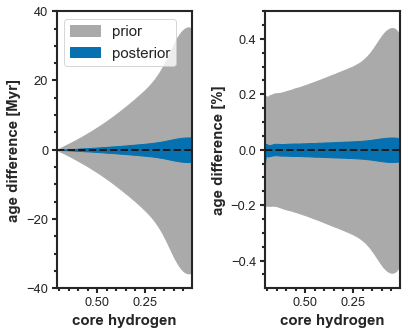

In [318]:
plt.figure(figsize=(6,5))

plt.subplot(121)

DFs = get_DFs('turnoff', 'm1')

Xmax = np.min(DFs[1].Xc)+0.001
Xmin = np.max(DFs[1].Xc)-0.001
Xs = np.linspace(Xmax, Xmin, 100)
#Xs = np.linspace(0.7, 0.1, 100)

m1m1 = InterpolatedUnivariateSpline(DFs[0]['Xc'], DFs[0]['age']*1e3)
m1s  = InterpolatedUnivariateSpline(DFs[1]['Xc'], DFs[1]['age']*1e3)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['Xc'], DFs[2]['age']*1e3)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), 
                     (m1m1(Xs) - m1s(Xs)), 
                 color='#aaaaaa', label=r'prior')

DFs = get_DFs('turnoff2', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['Xc'], DFs[0]['age']*1e3)
m1s  = InterpolatedUnivariateSpline(DFs[1]['Xc'], DFs[1]['age']*1e3)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['Xc'], DFs[2]['age']*1e3)
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)), 
                     (m1m1(Xs) - m1s(Xs)), 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)
plt.legend(loc='upper left')

#plt.xlim([0.71, 0.001])
plt.xlim([Xmin, Xmax])
plt.ylim([-40, 40])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.ylabel(r'age difference [Myr]');
plt.xlabel(r'core hydrogen')

plt.subplot(122)

DFs = get_DFs('turnoff', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['Xc'], DFs[0]['age']*1e3)
m1s  = InterpolatedUnivariateSpline(DFs[1]['Xc'], DFs[1]['age']*1e3)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['Xc'], DFs[2]['age']*1e3)
print(np.max((m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100))
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color='#aaaaaa', label=r'prior')

DFs = get_DFs('turnoff2', 'm1')
m1m1 = InterpolatedUnivariateSpline(DFs[0]['Xc'], DFs[0]['age']*1e3)
m1s  = InterpolatedUnivariateSpline(DFs[1]['Xc'], DFs[1]['age']*1e3)
m1p1 = InterpolatedUnivariateSpline(DFs[2]['Xc'], DFs[2]['age']*1e3)
print(np.max((m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100))
plt.fill_between(Xs, (m1p1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                     (m1m1(Xs) - m1s(Xs)) / m1s(Xs) * 100, 
                 color=blue, label=r'posterior')

plt.axhline(0, ls='--', c='k', zorder=100)

#plt.xlim([0.71, 0.001])
plt.xlim([Xmin, Xmax])
plt.ylim([-0.5, 0.5])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(3))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.ylabel(r'age difference [%]');
plt.xlabel(r'core hydrogen')

#plt.suptitle(r'$\qquad1~\rm{M}_\odot$', y=0.94)
plt.tight_layout()
plt.savefig('turnoff_1M.pdf')

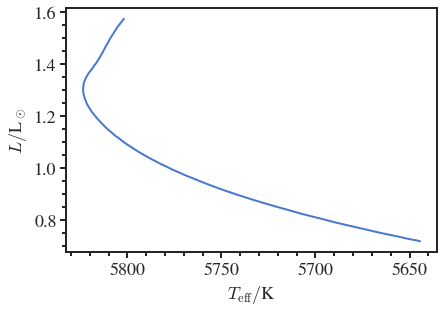

In [10]:
plt.plot(DF['Teff'], DF['L'])
plt.gca().invert_xaxis()
plt.xlabel(r'$T_{\rm{eff}}/$K')
plt.ylabel(r'$L/$L$_\odot$');

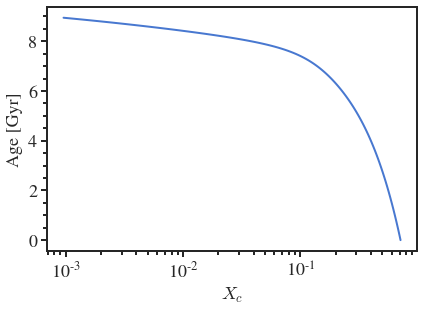

In [11]:
plt.plot(DF['Xc'], DF['age'])
plt.semilogx()
plt.xlabel(r'$X_c$')
plt.ylabel(r'Age [Gyr]');

In [12]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

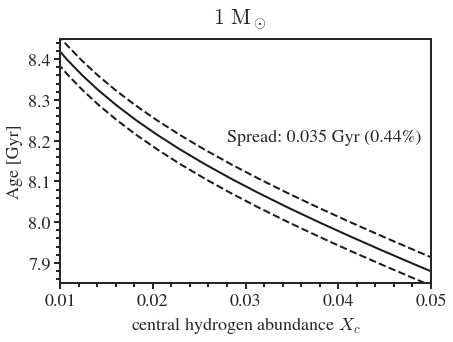

In [13]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')
plt.xlim([0.01, 0.05])
plt.ylim([7.85, 8.45])

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
plt.text(0.028, 8.2, s='Spread: ' + str(m1s-m1m1)[:5] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:4] + '%)')

plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');

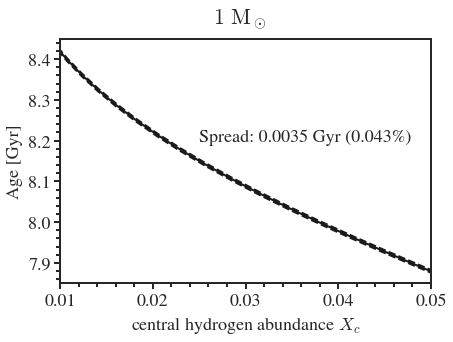

In [14]:
DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')
plt.xlim([0.01, 0.05])
plt.ylim([7.85, 8.45])

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
plt.text(0.025, 8.2, s='Spread: ' + str(m1s-m1m1)[:6] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:5] + '%)')

plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');

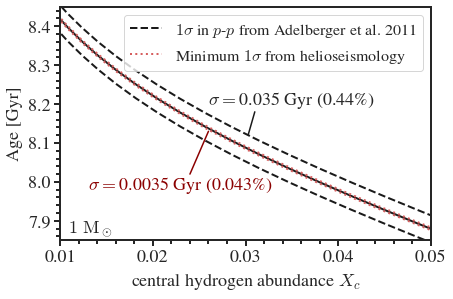

In [15]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--', label=r'$1\sigma$ in $p$-$p$ from Adelberger et al. 2011')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')

plt.plot([0.0303, 0.031], [8.122, 8.18], 'k-', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
plt.text(0.026, 8.2, 
         s=r'$\sigma = $' + str(m1s-m1m1)[:5] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:4] + '%)')

DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'r:', label=r'Minimum $1\sigma$ from helioseismology')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'r:')

plt.plot([0.026, 0.024], [8.13, 8.02], ls='-', color='darkred', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
plt.text(0.013, 7.98, 
         s=r'$\sigma = $' + str(m1s-m1m1)[:6] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:5] + '%)',
        c='darkred')

plt.xlim([0.01, 0.05])
plt.ylim([7.85, 8.45])

plt.legend()

plt.text(0.02, 0.05, r'$1~\rm{M}_\odot$',
     horizontalalignment='left',
     verticalalignment='center',
     transform = plt.gca().transAxes)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');
plt.tight_layout()
plt.savefig('turnoff_1M.pdf')

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59])

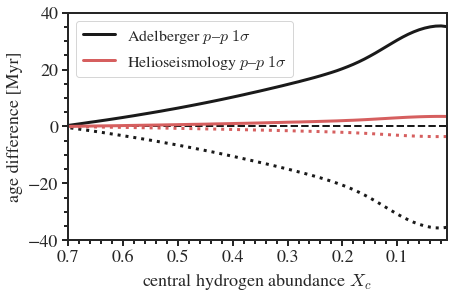

In [50]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

#DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
#       for rate in ['m1m1', 'm1s', 'm1p1']]

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age']*1000)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age']*1000)
m1p1 = interp1d(DFs[2]['Xc'], DFs[2]['age']*1000)

Xs = np.arange(0.01, 0.71, 0.01)
plt.plot(Xs, (m1p1(Xs) - m1s(Xs)), '-', c='k', lw=3, label=r'Adelberger $p$–$p$ $1\sigma$')
plt.plot(Xs, (m1m1(Xs) - m1s(Xs)), ':', c='k', lw=3)
plt.axhline(0, ls='--', c='k')

DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age']*1000)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age']*1000)
m1p1 = interp1d(DFs[2]['Xc'], DFs[2]['age']*1000)

plt.plot(Xs, (m1p1(Xs) - m1s(Xs)), '-', c='r', lw=3, label=r'Helioseismology $p$–$p$ $1\sigma$')
plt.plot(Xs, (m1m1(Xs) - m1s(Xs)), ':', c='r', lw=3)

#plt.xlim([0.01, 0.05])
#plt.ylim([7.85, 8.45])

plt.legend()

plt.xlim([0.7, 0.01])
plt.ylim(np.array([-0.04, 0.04])*1000)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'age difference [Myr]');
plt.tight_layout()
plt.savefig('turnoff_1M.pdf')

In [52]:
m1m1(0.01) - m1s(0.01)

-3.5299544625413546

$\sigma = $0.00600430 Gyr (0.0742360%)


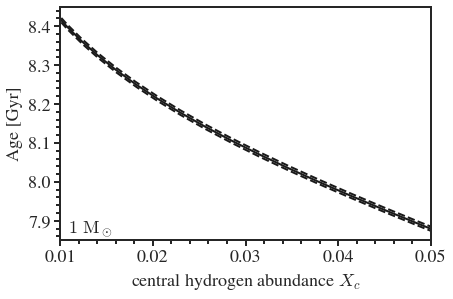

In [45]:
DFs = [pd.read_table('turnoff/r2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       if rate != 'm1s' else 
       pd.read_table('turnoff/m1s/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--', label=r'$1\sigma$ in $p$-$p$ from Adelberger et al. 2011')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
print(r'$\sigma = $' + str(m1m1-m1s)[:10] + ' Gyr (' + str((m1m1-m1s)/m1s*100)[:9] + '%)')

plt.xlim([0.01, 0.05])
plt.ylim([7.85, 8.45])

plt.text(0.02, 0.05, r'$1~\rm{M}_\odot$',
     horizontalalignment='left',
     verticalalignment='center',
     transform = plt.gca().transAxes)

plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');
plt.tight_layout()
#plt.savefig('turnoff_1M.pdf')

$\sigma = $-0.0118407 Gyr (-0.146396%)


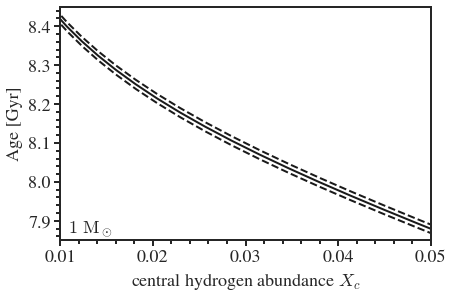

In [46]:
DFs = [pd.read_table('turnoff/r3/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       if rate != 'm1s' else 
       pd.read_table('turnoff/m1s/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m1m1', 'm1s', 'm1p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--', label=r'$1\sigma$ in $p$-$p$ from Adelberger et al. 2011')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
print(r'$\sigma = $' + str(m1m1-m1s)[:10] + ' Gyr (' + str((m1m1-m1s)/m1s*100)[:9] + '%)')

plt.xlim([0.01, 0.05])
plt.ylim([7.85, 8.45])

plt.text(0.02, 0.05, r'$1~\rm{M}_\odot$',
     horizontalalignment='left',
     verticalalignment='center',
     transform = plt.gca().transAxes)

plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');
plt.tight_layout()
#plt.savefig('turnoff_1M.pdf')

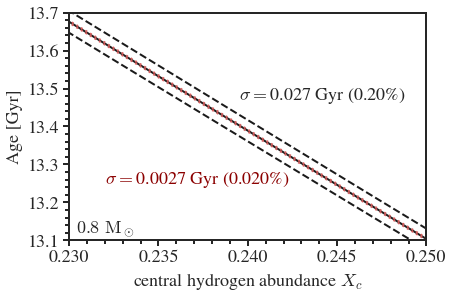

In [11]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m08m1', 'm08s', 'm08p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--', label=r'$1\sigma$ in $p$-$p$ from Adelberger et al. 2011')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')

#plt.plot([0.0303, 0.031], [8.122, 8.18], 'k-', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.25)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.25)
plt.text(0.2395, 13.47, 
         s=r'$\sigma = $' + str(m1s-m1m1)[:5] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:4] + '%)')

DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m08m1', 'm08s', 'm08p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'r:', label=r'Minimum $1\sigma$ from helioseismology')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'r:')

plt.plot([0.026, 0.024], [8.13, 8.02], ls='-', color='darkred', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.25)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.25)
plt.text(0.232, 13.25, 
         s=r'$\sigma = $' + str(m1s-m1m1)[:6] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:5] + '%)',
        c='darkred')

plt.xlim([0.23, 0.25])
plt.ylim([13.1, 13.7])

#plt.legend()

plt.text(0.02, 0.05, r'$0.8~\rm{M}_\odot$',
     horizontalalignment='left',
     verticalalignment='center',
     transform = plt.gca().transAxes)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');
plt.tight_layout()
plt.savefig('turnoff_08M.pdf')

-0.044 Gyr (-1.15%)
-0.077 Gyr (-1.99%)


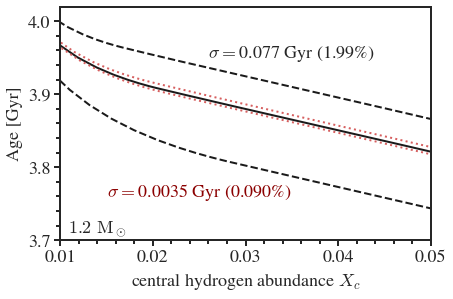

In [39]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--', label=r'$1\sigma$ in $p$-$p$ from Adelberger et al. 2011')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')

plt.plot([0.0303, 0.031], [8.122, 8.18], 'k-', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
m1p1 = interp1d(DFs[2]['Xc'], DFs[2]['age'])(0.03)
print(str(m1s-m1m1)[:6] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:5] + '%)')
print(str(m1p1-m1s)[:6] + ' Gyr (' + str((m1p1-m1s)/m1s*100)[:5] + '%)')
plt.text(0.026, 3.95, 
         s=r'$\sigma = $' + str(m1s-m1p1)[:5] + ' Gyr (' + str((m1s-m1p1)/m1s*100)[:4] + '%)')

DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'r:', label=r'Minimum $1\sigma$ from helioseismology')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'r:')

plt.plot([0.026, 0.024], [8.13, 8.02], ls='-', color='darkred', lw=1.5)

m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
m1p1 = interp1d(DFs[2]['Xc'], DFs[2]['age'])(0.03)
plt.text(0.015, 3.76, 
         s=r'$\sigma = $' + str(m1s-m1p1)[:6] + ' Gyr (' + str((m1s-m1p1)/m1s*100)[:5] + '%)',
        c='darkred')

plt.xlim([0.01, 0.05])
plt.ylim([3.7, 4.02])

#plt.legend()

plt.text(0.02, 0.05, r'$1.2~\rm{M}_\odot$',
     horizontalalignment='left',
     verticalalignment='center',
     transform = plt.gca().transAxes)

#plt.suptitle(r'$1~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');
plt.tight_layout()
plt.savefig('turnoff_12M.pdf')

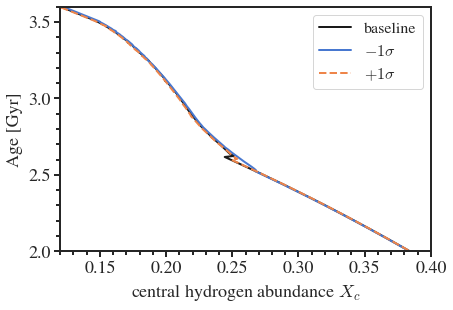

In [16]:
DFs = [pd.read_table('turnoff2/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[1]['Xc'], DFs[1]['age'], label=r'baseline', c='k')
plt.plot(DFs[0]['Xc'], DFs[0]['age'], label=r'$-1\sigma$', ls='-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], label=r'$+1\sigma$', ls='--')
plt.legend()
plt.xlim([0.12, 0.4])
plt.ylim([2, 3.6])
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');

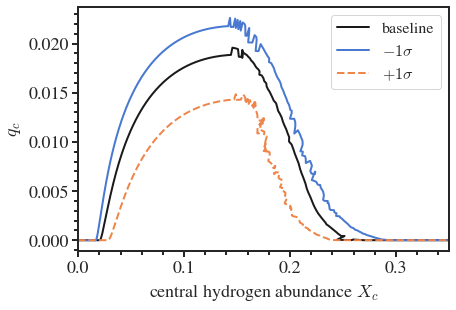

In [22]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[1]['Xc'], DFs[1]['qc'], label=r'baseline', c='k')
plt.plot(DFs[0]['Xc'], DFs[0]['qc'], label=r'$-1\sigma$', ls='-')
plt.plot(DFs[2]['Xc'], DFs[2]['qc'], label=r'$+1\sigma$', ls='--')
plt.legend()
plt.xlim([0, 0.35])
#plt.ylim([2, 3.6])
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'$q_c$');

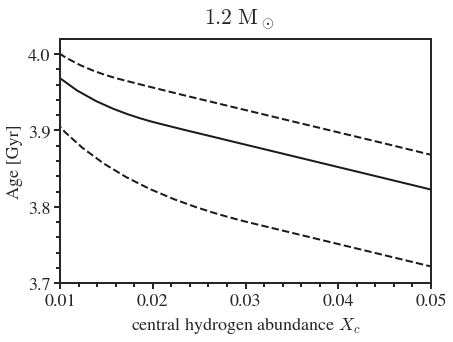

In [64]:
DFs = [pd.read_table('turnoff/' + rate + '/LOGS/history.data', sep='\s+', skiprows=4, names=colnames)
       for rate in ['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k--')
plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')
plt.xlim([0.01, 0.05])
plt.ylim([3.7, 4.02])

#m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
#m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
#plt.text(0.028, 8.2, s='Spread: ' + str(m1s-m1m1)[:5] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:4] + '%)')

plt.suptitle(r'$1.2~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');

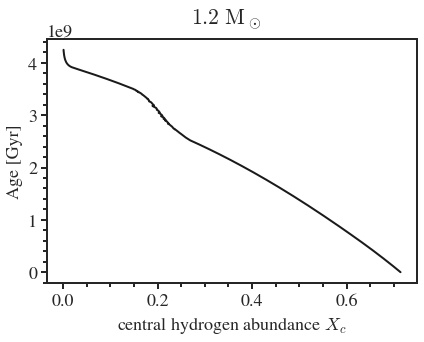

In [55]:
DFs = [pd.read_table('turnoff/' + rate + '/csum.01200.Z171479742.X71418029220.a187982123230.o0.27.s', sep='\s+', 
                     names=['M', 'age', 'R', 'Teff', 'L', 'Dcz', 'pc', 'Tc', 'Xc', 'X3c', 'rhoc', 'epsilonc', 'kappac', 'dradc', 'dadc', 'qcc', 'xcc', 'Yc', 'X14,c', 'X16,c', 'Xs', 'Zs'], 
                     skiprows=4)
                     #names=colnames)
       for rate in ['m12s']]#['m12m1', 'm12s', 'm12p1']]

plt.plot(DFs[0]['Xc'], DFs[0]['age'], 'k-')
#plt.plot(DFs[1]['Xc'], DFs[1]['age'], 'k-')
#plt.plot(DFs[2]['Xc'], DFs[2]['age'], 'k--')
#plt.xlim([0.2, 0.4])
#plt.ylim([1.5e9, 4e9])

#m1m1 = interp1d(DFs[0]['Xc'], DFs[0]['age'])(0.03)
#m1s  = interp1d(DFs[1]['Xc'], DFs[1]['age'])(0.03)
#plt.text(0.028, 8.2, s='Spread: ' + str(m1s-m1m1)[:5] + ' Gyr (' + str((m1s-m1m1)/m1s*100)[:4] + '%)')

plt.suptitle(r'$1.2~\rm{M}_\odot$')
plt.xlabel(r'central hydrogen abundance $X_c$')
plt.ylabel(r'Age [Gyr]');